#Load Dataset

In [61]:

import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk

nltk.download('punkt')

from pathlib import Path
import sys
import itertools

from pylab import savefig

#!pip install -q tensorflow-model-analysis
from gensim.models import KeyedVectors
#import tensorflow as tf
#import tensorflow_model_analysis as tfma

#===============================================================================
#Tensorflow and Keras 

#print('TFMA version: {}'.format(tfma.version.VERSION_STRING))

import tensorflow as tf
from tensorflow import keras

#import tensorflow_addons as tfa
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks

from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, LSTM, \
  SpatialDropout1D, Bidirectional, GlobalMaxPooling1D, Conv2D, MaxPool2D,\
  MaxPooling1D, Conv1D, Input, Reshape,Concatenate, Embedding, BatchNormalization,\
  GRU, GlobalAveragePooling1D

from tensorflow.compat.v1.keras.layers import CuDNNLSTM

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping,\
    ReduceLROnPlateau

from keras.layers import InputSpec, Layer
from keras import Model

from keras.metrics import MeanIoU

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())


#===============================================================================
import sklearn.metrics as skm

from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score, hamming_loss, accuracy_score 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import IterativeStratification
from skmultilearn.problem_transform import LabelPowerset

import os
import datetime

#import extra_keras_metrics
import pandas as pd

import numpy as np
from numpy import array

import re

import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

print(tf.__version__)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12830073960840793827
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17955292172858815980
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"
]
2.0.0
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Belldandy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#data = pd.read_csv('data2.csv', encoding='latin-1')
data = pd.read_csv('dataset_asli.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})


#Preproses

##My Preprocess

##Jurnal Based

In [4]:
import re
id_stopword_dict = pd.read_csv('stopword.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stopword = 'stopword.txt'
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    #\xf0\x9f\x98\x84\xf0\x9f\x98\x84\xf0\x9f\x98\x84'
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('xf0',' ',text) # Remove every retweet symbol
    text = re.sub('x9f',' ',text) # Remove every retweet symbol
    text = re.sub('x98',' ',text) # Remove every retweet symbol
    text = re.sub('x82',' ',text) # Remove every retweet symbol
    text = re.sub('x84',' ',text) # Remove every retweet symbol
    text = re.sub('xe2',' ',text) # Remove every retweet symbol
    text = re.sub('x80',' ',text) # Remove every retweet symbol
    text = re.sub('amp',' ',text) # Remove every retweet symbolxa6
    text = re.sub('xa6',' ',text) # Remove every retweet symbol xa4
    text = re.sub('xa4',' ',text) # Remove every retweet symbol

    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text
    
    return "".join([""+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered_sentence]).strip()

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe


In [5]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

##Functional

In [53]:
def f_score(X, Y, model, iter, name):

  predictions=model.predict([X])
  thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  y_true = Y
  thres = 1

  #Path(pic+versi+"/"+name).mkdir(parents=True, exist_ok=True)

  for val in thresholds:
    pred = predictions.copy()

    pred[pred>=val]=1
    pred[pred<val]=0

    #y_true = Y
    y_pred = pred

    cm = skm.multilabel_confusion_matrix(y_true, y_pred)
    
    true = np.random.randint(0, 20, size=100)
    pred = np.random.randint(0, 20, size=100)
    labels = np.arange(12)

    target_names = categories

    clf_report = classification_report(y_true,
                                    y_pred,
                                    labels=labels,
                                    target_names=target_names,
                                    output_dict=True)
    
    plt.figure(figsize = (10,5))
    # .iloc[:-1, :] to exclude support
    fig = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    fig.plot()
    #sns.heatmap(pd.DataFrame(clf_report).T, annot=True)

    fig.figure.savefig(pic+versi+"/"+name+"/"+str(iter)+"_"+name+"_thresh_"+str(thres)+"_f_score", dpi=640)
    
    print("Gambar untuk Threshold {} telah di export".format(thres))
    thres += 1
    

  #fig.close('all')
  #sns.savefig(pic+iter+name)
  #figure.savefig(pic+iter+name)

  #print("Menyimpan Gambar " +pic+versi+"/"+str(iter)+name+"_f_score")
  #print(cm)
  #print(skm.classification_report(y_true,y_pred))


def plot_confusion_matrix(cm, classes, title, ax):

    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks), ax.xaxis.set_ticklabels(classes)
    ax.set_yticks(tick_marks), ax.yaxis.set_ticklabels(classes)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')
    ax.set_title(title)
    ax.grid(False)
    
def plot_multiclass_confusion_matrix(y_true, y_pred, iter, label_to_class, name, save_plot=False):
    fig, axes = plt.subplots(int(np.ceil(len(label_to_class) / 4)), 4, figsize=(10, 10))
    axes = axes.flatten()
    for i, conf_matrix in enumerate(multilabel_confusion_matrix(y_true, y_pred)):
        tn, fp, fn, tp = conf_matrix.ravel()
        f1 = 2 * tp / (2 * tp + fp + fn + sys.float_info.epsilon)
        recall = tp / (tp + fn + sys.float_info.epsilon)
        precision = tp / (tp + fp + sys.float_info.epsilon)
        plot_confusion_matrix(
            np.array([[tp, fn], [fp, tn]]),
            classes=['+', '-'],
            title=f'Label: {label_to_class[i]}\nf1={f1:.5f}\nrecall={recall:.5f}\nprecision={precision:.5f}',
            ax=axes[i]
        )
        plt.tight_layout()
    if save_plot:
        plt.savefig(pic+versi+"/"+str(iter)+"_"+name+"_CM", dpi=640)
        plt.close('all')
    print("Graph {} telah diexport".format(name))


def jaccard_distance(y_true, y_pred, smooth=0):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def hamming_test_2(y_true, y_pred):
  return (y_true == y_pred).mean()

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)

    return np.mean(acc_list)

def presisi(y_true, y_pred,):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    len(y_true)
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)

    return np.mean(acc_list)

def rekal(y_true, y_pred,):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                     len(y_pred)
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)

    return np.mean(acc_list)

def f1_skor(y_true, y_pred,):

    #f1 = (2*precision*recall)/(precision+recall+K.epsilon())
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a =  (len (2*(set_true.intersection(set_pred))))/\
                    len(y_true) + len(y_pred)
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)

    return np.mean(acc_list)

def metric_sklearn(X, Y, model, name, iter):

    #Path(fitur+versi+"/"+name).mkdir(parents=True, exist_ok=True) 
    predictions=model.predict([X])
    thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y_true = Y
    thres = 1

    StoreData = pd.DataFrame(columns=['Thresholds','Precision Micro','Precision Macro', 'Recall Micro','Recall Macro', 'F1-measure Micro','F1-measure Macro','Jaccard', 'Hamming Loss', 'Hamming Score','Exact Accuracy'], dtype=float).fillna('0')
    
    for val in thresholds:
        print("For threshold: ", val)
        pred=predictions.copy()
      
        pred[pred>=val]=1
        pred[pred<val]=0
      
        precision = precision_score(y_true, pred, average='micro')
        recall = recall_score(y_true, pred, average='micro')
        f1 = f1_score(y_true, pred, average='micro')
        precision_m = precision_score(y_true, pred, average='macro')
        recall_m = recall_score(y_true, pred, average='macro')
        f1_m = f1_score(y_true, pred, average='macro')
        jaccard = jaccard_score(y_true, pred, average='micro')
        haming_losses = hamming_loss(y_true, pred)
        acc = accuracy_score(y_true, pred, normalize=True)
        hamming_scores = hamming_score(y_true, pred)
        hamming_score_2 = hamming_test_2(y_true, pred)
        #acc_scores = acc_score(y_true, pred)
        #f1_baru = f1_skor(y_true, pred,)
        #presisi_baru = presisi(y_true, pred)
        #recall_baru = rekal(y_true, pred)

        #StoreData = pd.DataFrame(columns=['Thresholds','Precision', 'Recall', 'F1-measure', 'Jaccard', 'Hamming Loss', 'Hamming Score','Exact Accuracy'], dtype=float).fillna('0')
        StoreData = StoreData.append(pd.DataFrame({
                        'Thresholds':[val],
                        'Precision Micro':[precision],
                        'Precision Macro':[precision_m],
                        'Recall Micro':[recall],
                        'Recall Macro':[recall_m],
                        'F1-measure Micro':[f1],         
                        'F1-measure Macro':[f1_m],
                        'Jaccard':[jaccard],
                        'Hamming Loss':[haming_losses],
                        'Hamming Score':[hamming_scores],
                        'Exact Accuracy':[acc],
                        }))
        thres += 1
        print("Micro-average quality numbers")
        print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}, Jaccard: {:.4f}, Hamming Loss: {:.4f}, Hamming Score: {:.4f}, Hamming Score 2: {:.4f}, Accuracy: {:.4f},"\
              .format(precision, recall, f1, jaccard, haming_losses, 
                      hamming_scores, hamming_score_2, acc, 
                      #f1_baru, presisi_baru, recall_baru
                      ))
        
    StoreData.to_csv("result_{}_{}.csv".format(name, str(iter)))
    print("Data Telah Diexport")



##Special

In [78]:
maxlen=200
def att_lstm(cat, embedding_matrix):

    inp = Input(shape=(200,))
    x = Embedding(num_words, 200, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(cat, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


###HS & ABUSIVE

In [79]:
from gensim.models import KeyedVectors
#data = data.drop(["Normal",], axis=1)
data = pd.read_csv('dataset_asli.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

data['Tweet'] = data['Tweet'].apply(preprocess)
#data['Tweet'] = data['Tweet'].apply(clean_tweet)
data['Tweet'].replace('', np.nan, inplace=True)
data.dropna(subset=['Tweet'], inplace=True)

data = data.drop(["HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong",], axis=1)


num_words = 10700
maxlen = 200

X = []
sentences = list(data["Tweet"])
for sen in sentences:
    X.append(sen)

categories = list(data.columns.values)
categories = categories[1:]
print(categories)
print(len(categories))

data_label = data[categories]

y = data_label.values
len(y)


model_ug_cbow = KeyedVectors.load('new_wv_cbow.word2vec')
model_ug_sg = KeyedVectors.load('new_wv_skipgram.word2vec')

embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Ada %s word vectors.' % len(embeddings_index))

tokenizer = Tokenizer(num_words=num_words, oov_token="OOV")
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
#X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(X, padding='pre', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#import pickle

# saving
#with open('tokenizer_90.pickle', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

['HS', 'Abusive']
2
Ada 7119 word vectors.


In [80]:
from skmultilearn.model_selection.iterative_stratification import  iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, 0.1)
print("Data Train X = {} ".format(len(X_train)))
print("Data Train Y = {} ".format(len(y_train)))
print("Data Test X = {} ".format(len(X_test)))
print("Data Test Y = {} ".format(len(y_test)))

Data Train X = 11802 
Data Train Y = 11802 
Data Test X = 1312 
Data Test Y = 1312 


In [81]:
#from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
#mskf = MultilabelStratifiedKFold(n_splits=10, random_state=0)

cvscores = []

iterasi = 1
Y = data_label[categories].values
name = "Main"
part = "Main"

print("======================================================")
print("Iterasi = "+str(iterasi)+"\n")
model = att_lstm(len(categories), embedding_matrix)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callback
#logdir = os.path.join("../log/"+versi+"/"+part+"/"+"att_bilstm", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_lstm_2 = TensorBoard(logdir, histogram_freq=1)

filepath="Main_BiLSTM_Att.h5"

save_model = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

stop_train = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=3, verbose=1, mode='min', 
                          baseline=None, restore_best_weights=True)

callbacks_list = [
                  #tensorboard_lstm_2, 
                  save_model,
                  stop_train,
                  ]
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=128, class_weight='balance',
          verbose=1,validation_data=(X_test, y_test), 
          callbacks=callbacks_list
          )
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


metric_sklearn(X_test, y_test, model, name, iterasi)

#y_true = y_test
#y_pred = (model.predict(X_test) >= 0.5).astype('int')
#plot_multiclass_confusion_matrix(y_true, y_pred, iterasi, categories, name, save_plot=True)
#f_score(X[test], Y[test], model, iterasi, name)



  # create model
  
  #model.summary()
  
  # Compile model



Iterasi = 1

Train on 11802 samples, validate on 1312 samples
Epoch 1/100
11802/11802 [==============================] - 89s 8ms/step - loss: 0.4172 - accuracy: 0.8070 - val_loss: 0.3512 - val_accuracy: 0.8464

Epoch 00001: val_accuracy improved from -inf to 0.84642, saving model to Main_BiLSTM_Att.h5
Epoch 2/100
11802/11802 [==============================] - 86s 7ms/step - loss: 0.3290 - accuracy: 0.8536 - val_loss: 0.3101 - val_accuracy: 0.8655

Epoch 00002: val_accuracy improved from 0.84642 to 0.86547, saving model to Main_BiLSTM_Att.h5
Epoch 3/100
11802/11802 [==============================] - 85s 7ms/step - loss: 0.2844 - accuracy: 0.8766 - val_loss: 0.2872 - val_accuracy: 0.8708

Epoch 00003: val_accuracy improved from 0.86547 to 0.87081, saving model to Main_BiLSTM_Att.h5
Epoch 4/100
11802/11802 [==============================] - 85s 7ms/step - loss: 0.2546 - accuracy: 0.8885 - val_loss: 0.2971 - val_accuracy: 0.8746

Epoch 00004: val_accuracy improved from 0.87081 to 0.87462, 

###Target

In [85]:
#data = data.drop(["Normal",], axis=1)
data = pd.read_csv('dataset_asli.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

data['Tweet'] = data['Tweet'].apply(preprocess)
#data['Tweet'] = data['Tweet'].apply(clean_tweet)
data['Tweet'].replace('', np.nan, inplace=True)
data.dropna(subset=['Tweet'], inplace=True)

data = data.drop(["HS","Abusive","HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong",], axis=1)


num_words = 10700
maxlen = 200

X = []
sentences = list(data["Tweet"])
for sen in sentences:
    X.append(sen)

categories = list(data.columns.values)
categories = categories[1:]
print(categories)
print(len(categories))

data_label = data[categories]

y = data_label.values
len(y)

from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('new_wv_cbow.word2vec')
model_ug_sg = KeyedVectors.load('new_wv_skipgram.word2vec')

embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Ada %s word vectors.' % len(embeddings_index))

tokenizer = Tokenizer(num_words=num_words, oov_token="OOV")
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
#X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(X, padding='pre', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#import pickle

# saving
#with open('tokenizer_90.pickle', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#=================================================================================================
from skmultilearn.model_selection.iterative_stratification import  iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, 0.1)
print("Data Train X = {} ".format(len(X_train)))
print("Data Train Y = {} ".format(len(y_train)))
print("Data Test X = {} ".format(len(X_test)))
print("Data Test Y = {} ".format(len(y_test)))

['HS_Individual', 'HS_Group']
2
Ada 7119 word vectors.
Data Train X = 11802 
Data Train Y = 11802 
Data Test X = 1312 
Data Test Y = 1312 


In [87]:

cvscores = []

iterasi = 1
Y = data_label[categories].values
name = "BiLSTM_Att_Target"
part = "Target"

print("======================================================")
print("Iterasi = "+str(iterasi)+"\n")
model = att_lstm(len(categories), embedding_matrix)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callback
#logdir = os.path.join("/content/drive/My Drive/1.Skripsi/Projek/Baru/log/"+versi+"/"+part+"/"+"att_bilstm", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_lstm_2 = TensorBoard(logdir, histogram_freq=1)

filepath="Target_BiLSTM_Att.h5"

save_model = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

stop_train = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=3, verbose=1, mode='min', 
                          baseline=None, restore_best_weights=True)

callbacks_list = [
                  #tensorboard_lstm_2, 
                  save_model,
                  stop_train,
                  ]
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=128, class_weight='balance',
          verbose=1,validation_data=(X_test, y_test), 
          callbacks=callbacks_list
          )
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


#metric_sklearn(X_test, y_test, model, name, iterasi)

#y_true = y_test
#y_pred = (model.predict(X_test) >= 0.5).astype('int')
#plot_multiclass_confusion_matrix(y_true, y_pred, iterasi, categories, name, save_plot=True)
#f_score(X[test], Y[test], model, iterasi, name)



  # create model
  
  #model.summary()
  
  # Compile model



Iterasi = 1

Train on 11802 samples, validate on 1312 samples
Epoch 1/100
11802/11802 [==============================] - 97s 8ms/step - loss: 0.3972 - accuracy: 0.8172 - val_loss: 0.3524 - val_accuracy: 0.8457

Epoch 00001: val_accuracy improved from -inf to 0.84566, saving model to Target_BiLSTM_Att.h5
Epoch 2/100
11802/11802 [==============================] - 94s 8ms/step - loss: 0.3416 - accuracy: 0.8456 - val_loss: 0.3507 - val_accuracy: 0.8472

Epoch 00002: val_accuracy improved from 0.84566 to 0.84718, saving model to Target_BiLSTM_Att.h5
Epoch 3/100
11802/11802 [==============================] - 93s 8ms/step - loss: 0.3136 - accuracy: 0.8587 - val_loss: 0.3345 - val_accuracy: 0.8533

Epoch 00003: val_accuracy improved from 0.84718 to 0.85328, saving model to Target_BiLSTM_Att.h5
Epoch 4/100
11802/11802 [==============================] - 93s 8ms/step - loss: 0.2856 - accuracy: 0.8732 - val_loss: 0.3400 - val_accuracy: 0.8586

Epoch 00004: val_accuracy improved from 0.85328 to 0.8

###Type

In [88]:
#data = data.drop(["Normal",], axis=1)
data = pd.read_csv('dataset_asli.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

data['Tweet'] = data['Tweet'].apply(preprocess)
#data['Tweet'] = data['Tweet'].apply(clean_tweet)
data['Tweet'].replace('', np.nan, inplace=True)
data.dropna(subset=['Tweet'], inplace=True)


#data = data.drop(["HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong",], axis=1)

data = data.drop(["HS","Abusive","HS_Individual", "HS_Group", "HS_Weak", "HS_Moderate", "HS_Strong",], axis=1)


num_words = 10700
maxlen = 200

X = []
sentences = list(data["Tweet"])
for sen in sentences:
    X.append(sen)

categories = list(data.columns.values)
categories = categories[1:]
print(categories)
print(len(categories))

data_label = data[categories]

y = data_label.values
len(y)

from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('new_wv_cbow.word2vec')
model_ug_sg = KeyedVectors.load('new_wv_skipgram.word2vec')

embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Ada %s word vectors.' % len(embeddings_index))

tokenizer = Tokenizer(num_words=num_words, oov_token="OOV")
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
#X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(X, padding='pre', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#import pickle

# saving
#with open('tokenizer_90.pickle', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#=================================================================================================
from skmultilearn.model_selection.iterative_stratification import  iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, 0.1)
print("Data Train X = {} ".format(len(X_train)))
print("Data Train Y = {} ".format(len(y_train)))
print("Data Test X = {} ".format(len(X_test)))
print("Data Test Y = {} ".format(len(y_test)))

['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
5
Ada 7119 word vectors.
Data Train X = 11802 
Data Train Y = 11802 
Data Test X = 1312 
Data Test Y = 1312 


In [89]:

cvscores = []

iterasi = 1
Y = data_label[categories].values
name = "BiLSTM_Att_type"
part = "Type"

print("======================================================")
print("Iterasi = "+str(iterasi)+"\n")
model = att_lstm(len(categories), embedding_matrix)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callback
#logdir = os.path.join("/content/drive/My Drive/1.Skripsi/Projek/Baru/log/"+versi+"/"+part+"/"+"att_bilstm", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_lstm_2 = TensorBoard(logdir, histogram_freq=1)

filepath="Type_BiLSTM_Att.h5"

save_model = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

stop_train = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=3, verbose=1, mode='min', 
                          baseline=None, restore_best_weights=True)

callbacks_list = [
                  #tensorboard_lstm_2, 
                  save_model,
                  stop_train,
                  ]
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=128, class_weight='balance',
          verbose=1,validation_data=(X_test, y_test), 
          callbacks=callbacks_list
          )
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


#metric_sklearn(X_test, y_test, model, name, iterasi)

#y_true = y_test
#y_pred = (model.predict(X_test) >= 0.5).astype('int')
#plot_multiclass_confusion_matrix(y_true, y_pred, iterasi, categories, name, save_plot=True)
#f_score(X[test], Y[test], model, iterasi, name)



  # create model
  
  #model.summary()
  
  # Compile model



Iterasi = 1

Train on 11802 samples, validate on 1312 samples
Epoch 1/100
11802/11802 [==============================] - 92s 8ms/step - loss: 0.1860 - accuracy: 0.9276 - val_loss: 0.1467 - val_accuracy: 0.9457

Epoch 00001: val_accuracy improved from -inf to 0.94573, saving model to Type_BiLSTM_Att.h5
Epoch 2/100
11802/11802 [==============================] - 88s 7ms/step - loss: 0.1372 - accuracy: 0.9459 - val_loss: 0.1435 - val_accuracy: 0.9462

Epoch 00002: val_accuracy improved from 0.94573 to 0.94619, saving model to Type_BiLSTM_Att.h5
Epoch 3/100
11802/11802 [==============================] - 89s 8ms/step - loss: 0.1168 - accuracy: 0.9539 - val_loss: 0.1400 - val_accuracy: 0.9463

Epoch 00003: val_accuracy improved from 0.94619 to 0.94634, saving model to Type_BiLSTM_Att.h5
Epoch 4/100
11802/11802 [==============================] - 89s 8ms/step - loss: 0.1038 - accuracy: 0.9591 - val_loss: 0.1441 - val_accuracy: 0.9459

Epoch 00004: val_accuracy did not improve from 0.94634
Epoch

###Level

In [90]:
#data = data.drop(["Normal",], axis=1)
data = pd.read_csv('dataset_asli.csv', encoding='latin-1')

alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

data['Tweet'] = data['Tweet'].apply(preprocess)
#data['Tweet'] = data['Tweet'].apply(clean_tweet)
data['Tweet'].replace('', np.nan, inplace=True)
data.dropna(subset=['Tweet'], inplace=True)


#data = data.drop(["HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong",], axis=1)

data = data.drop(["HS","Abusive","HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other",], axis=1)


num_words = 10700
maxlen = 200

X = []
sentences = list(data["Tweet"])
for sen in sentences:
    X.append(sen)

categories = list(data.columns.values)
categories = categories[1:]
print(categories)
print(len(categories))

data_label = data[categories]

y = data_label.values
len(y)

from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('new_wv_cbow.word2vec')
model_ug_sg = KeyedVectors.load('new_wv_skipgram.word2vec')

embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Ada %s word vectors.' % len(embeddings_index))

tokenizer = Tokenizer(num_words=num_words, oov_token="OOV")
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
#X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(X, padding='pre', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#import pickle

# saving
#with open('tokenizer_90.pickle', 'wb') as handle:
#    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#=================================================================================================
from skmultilearn.model_selection.iterative_stratification import  iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, 0.1)
print("Data Train X = {} ".format(len(X_train)))
print("Data Train Y = {} ".format(len(y_train)))
print("Data Test X = {} ".format(len(X_test)))
print("Data Test Y = {} ".format(len(y_test)))

['HS_Weak', 'HS_Moderate', 'HS_Strong']
3
Ada 7119 word vectors.
Data Train X = 11802 
Data Train Y = 11802 
Data Test X = 1312 
Data Test Y = 1312 


In [91]:


cvscores = []

iterasi = 1
Y = data_label[categories].values
name = "BiLSTM_Att_Level"
part = "Level"

print("======================================================")
print("Iterasi = "+str(iterasi)+"\n")
model = att_lstm(len(categories), embedding_matrix)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#callback
#logdir = os.path.join("/content/drive/My Drive/1.Skripsi/Projek/Baru/log/"+versi+"/"+part+"/"+"att_bilstm", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_lstm_2 = TensorBoard(logdir, histogram_freq=1)

filepath="Level_BiLSTM_Att.h5"

save_model = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

stop_train = EarlyStopping(monitor='val_loss', 
                          min_delta=0, patience=3, verbose=1, mode='min', 
                          baseline=None, restore_best_weights=True)

callbacks_list = [
                  #tensorboard_lstm_2, 
                  save_model,
                  stop_train,
                  ]
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=128, class_weight='balance',
          verbose=1,validation_data=(X_test, y_test), 
          callbacks=callbacks_list
          )
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


#metric_sklearn(X_test, y_test, model, name, iterasi)

#y_true = y_test
#y_pred = (model.predict(X_test) >= 0.5).astype('int')
#plot_multiclass_confusion_matrix(y_true, y_pred, iterasi, categories, name, save_plot=True)
#f_score(X[test], Y[test], model, iterasi, name)



  # create model
  
  #model.summary()
  
  # Compile model



Iterasi = 1

Train on 11802 samples, validate on 1312 samples
Epoch 1/100
11802/11802 [==============================] - 87s 7ms/step - loss: 0.3012 - accuracy: 0.8699 - val_loss: 0.2553 - val_accuracy: 0.8877

Epoch 00001: val_accuracy improved from -inf to 0.88770, saving model to Level_BiLSTM_Att.h5
Epoch 2/100
11802/11802 [==============================] - 86s 7ms/step - loss: 0.2520 - accuracy: 0.8894 - val_loss: 0.2558 - val_accuracy: 0.8874

Epoch 00002: val_accuracy did not improve from 0.88770
Epoch 3/100
11802/11802 [==============================] - 86s 7ms/step - loss: 0.2284 - accuracy: 0.9000 - val_loss: 0.2508 - val_accuracy: 0.8918

Epoch 00003: val_accuracy improved from 0.88770 to 0.89177, saving model to Level_BiLSTM_Att.h5
Epoch 4/100
11802/11802 [==============================] - 85s 7ms/step - loss: 0.2089 - accuracy: 0.9113 - val_loss: 0.2458 - val_accuracy: 0.8974

Epoch 00004: val_accuracy improved from 0.89177 to 0.89736, saving model to Level_BiLSTM_Att.h5
Ep

#Evaluation

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
from keras.models import load_model
import pickle
maxlen = 200
tokenizer = Tokenizer(5000)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

#categories = list(data.columns.values)
#categories = categories[1:]
#print(categories)
#%cd "/content/drive/My Drive/1.Skripsi/Projek/Baru/Model/Rev4/"

lstm = load_model('10_LSTM_Normal.h5')
lstm_w2v = load_model('10_LSTM_W2V.h5')

cnn = load_model('10_CNN_Normal.h5')
cnn_w2v = load_model('10_CNN_W2V.h5')

#%cd "/content/drive/"

def prediction_to_label(prediction):
    tag_prob = [(categories[i], prob) for i, prob in enumerate(prediction.tolist())]
    return dict(sorted(tag_prob, key=lambda kv: kv[1], reverse=False))

def get_features(text_series):
    """
    transforms text data to feature_vectors that can be used in the ml model.
    tokenizer must be available.
    """
    sequences = tokenizer.texts_to_sequences(text_series)
    return pad_sequences(sequences, maxlen=maxlen)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
%cd "/content/drive/My Drive/1.Skripsi/Projek/Baru/Model/Rev4/"

In [ ]:
test = pd.read_csv('dataset_10.csv', encoding='latin-1')
test['Tweet'] = test['Tweet'].apply(preprocess)

In [ ]:
X_test = []
sentences = list(test["Tweet"])
for sen in sentences:
    X_test.append(sen)

categories = list(test.columns.values)
categories = categories[1:]
print(categories)
print(len(categories))

data_label = test[categories]

y_test = data_label.values
len(y_test)

X_test = get_features(X_test)

['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
12


In [ ]:
text = "Cina Asu"

q = preprocess(text)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

f =  get_features([q])
print(f)

p1 = prediction_to_label(lstm.predict(f)[0])
p2 = prediction_to_label(lstm_w2v.predict(f)[0])
p3 = prediction_to_label(cnn.predict(f)[0])
p4 = prediction_to_label(cnn_w2v.predict(f)[0])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0 19 60]]


In [ ]:
df = pd.DataFrame()
df['label'] = p1.keys()
df['lstm'] = p1.values()
df['lstm_w2v'] = df.label.apply(lambda label : p2.get(label))
df['weighted_lstm'] = (2 * df['lstm_w2v'] + df['lstm']) / 3
df['cnn'] = df.label.apply(lambda label : p3.get(label))
df['cnn_w2v'] = df.label.apply(lambda label : p4.get(label))
df['weighted_cnn'] = (2 * df['cnn_w2v'] + df['cnn']) / 3
df['both'] = (2 * df['weighted_cnn'] + df['weighted_lstm']) / 3
df.sort_values(by='lstm_w2v', ascending=False)[:4]


,label,lstm,lstm_w2v,weighted_lstm,cnn,cnn_w2v,weighted_cnn,both
6,HS_Moderate,0.035833,0.529290,0.364805,0.121054,0.017171,0.051798,0.156134
11,HS_Other,0.245857,0.527902,0.433887,0.375397,0.135330,0.215352,0.288197
7,HS,0.165466,0.526290,0.406015,0.559074,0.227842,0.338253,0.360840
5,HS_Group,0.031684,0.514805,0.353765,0.127919,0.013949,0.051939,0.152547


In [ ]:
#optional
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9000)

In [ ]:
cnn_w2v.evaluate(X_test, y_test)

1317/1317 [==============================] - 6s 5ms/step


[0.8900064979888493, 0.826309859752655]

In [ ]:
cnn.evaluate(X_test, y_test)

1317/1317 [==============================] - 0s 164us/step


[0.4595354625286256, 0.7342445254325867]

In [ ]:
lstm_w2v.evaluate(X_test, y_test)

1317/1317 [==============================] - 2s 1ms/step


[1.4344664118737096, 0.32890406250953674]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

predictions=lstm.predict(X_test)
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for val in thresholds:
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print("Treshold = "+str(val))   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f} \n".format(precision, recall, f1))

Treshold = 0.1
Micro-average quality numbers
Precision: 0.1544, Recall: 0.4258, F1-measure: 0.2115 

Treshold = 0.2
Micro-average quality numbers
Precision: 0.1327, Recall: 0.4167, F1-measure: 0.1997 

Treshold = 0.3
Micro-average quality numbers
Precision: 0.1228, Recall: 0.2815, F1-measure: 0.1661 

Treshold = 0.4
Micro-average quality numbers
Precision: 0.0924, Recall: 0.0377, F1-measure: 0.0488 

Treshold = 0.5
Micro-average quality numbers
Precision: 0.0419, Recall: 0.0044, F1-measure: 0.0071 

Treshold = 0.6
Micro-average quality numbers
Precision: 0.0417, Recall: 0.0008, F1-measure: 0.0016 

Treshold = 0.7
Micro-average quality numbers
Precision: 0.0238, Recall: 0.0005, F1-measure: 0.0009 

Treshold = 0.8
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000 

Treshold = 0.9
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from skmultilearn.model_selection.iterative_stratification import iterative_train_test_split

X_train, X_test, y_train, y_test = iterative_train_test_split(X, y, test_size=0.1,)



#Test Kfold

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5959)
kfold = KFold(n_splits=10, shuffle=True, random_state=6969)
mskf = MultilabelStratifiedKFold(n_splits=10, random_state=0)
cvscores = []
iterasi = 1

from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

from sklearn.preprocessing import LabelEncoder
print(len(X))
Y = data_label[categories].values
print(len(Y))

def plot_cv_indices(cv, X, y , ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, )):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    #ax.scatter(range(len(X)), [ii + 1.5] * len(X),
    #           c=y, marker='_', lw=lw, cmap=cmap_data)

    #ax.scatter(range(len(X)), [ii + 2.5] * len(X),
    #           c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    #yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(#yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Jumlah Data', ylabel="CV Iterasi",
           #ylim=[n_splits+2.2, -.2], xlim=[0, 100]
           )
    ax.set_title("Visualisasi Pembagian Data", fontsize=15)
    return ax


ModuleNotFoundError: ignored

TypeError: ignored

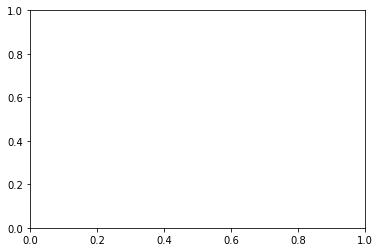

In [ ]:
fig, ax = plt.subplots()
cv = kfold(10)
n_splits = 10
plot_cv_indices(cv, X, Y, ax, n_splits)

In [ ]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


#visualize_groups(y, groups, 'no groups')

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


In [ ]:
import numpy as np

y_true = np.array([[0,1,0],
                   [0,1,1],
                   [1,0,1],
                   [0,0,1],
                   [1,1,1],])

y_pred = np.array([[0,1,1],
                   [0,1,1],
                   [0,1,0],
                   [0,0,0],
                   [1,0,1],])


In [ ]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        print('\nset_true: {0}'.format(set_true))
        print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
        print(acc_list)
    return np.mean(acc_list)

In [ ]:
hamming_score(y_true, y_pred)


set_true: {1}
set_pred: {1, 2}
tmp_a: 0.5
[0.5]

set_true: {1, 2}
set_pred: {1, 2}
tmp_a: 1.0
[0.5, 1.0]

set_true: {0, 2}
set_pred: {1}
tmp_a: 0.0
[0.5, 1.0, 0.0]

set_true: {2}
set_pred: set()
tmp_a: 0.0
[0.5, 1.0, 0.0, 0.0]

set_true: {0, 1, 2}
set_pred: {0, 2}
tmp_a: 0.6666666666666666
[0.5, 1.0, 0.0, 0.0, 0.6666666666666666]


0.4333333333333333